# 衡量回归算法的标准

In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
boston = datasets.load_boston()

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [8]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
x = boston.data[:, 5]

In [13]:
y = boston.target

In [14]:
y.shape

(506,)

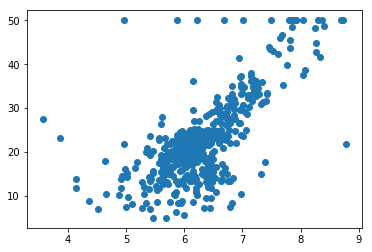

In [15]:
plt.scatter(x, y)

In [16]:
x = x[y < 50]
y = y[y < 50]

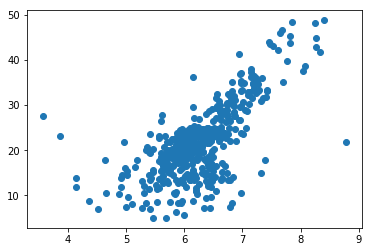

In [18]:
plt.scatter(x, y)

In [19]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

In [33]:
x_train.shape

(367,)

In [34]:
x_test.shape

(123,)

In [36]:
%run /home/lds/code/machine-learning/study/LinearRegression/SimpleLinearRegression2.py

In [38]:
reg = SimpleLinearRegression2()

In [39]:
reg.fit(x_train, y_train)

SimpleLinearRegression2()

In [40]:
reg.a_

7.833972917686116

In [41]:
reg.b_

-27.25275526687991

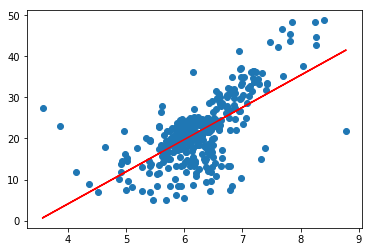

In [42]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='red')

In [43]:
y_predict = reg.predict(x_test)

# MSE

In [44]:
mse_test = np.sum((y_predict - y_test) ** 2)/len(y_test)
mse_test

28.215949368640807

# RMSE

In [46]:
from math import sqrt
rmse_test = sqrt(mse_test)

In [48]:
rmse_test

5.311868726600913

# MAE

In [49]:
mae_test = np.sum(np.absolute(y_predict - y_test))/len(y_test)

In [50]:
mae_test

3.9489046062737834

# scikit-learn 中的MSE和MAE

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [53]:
mean_absolute_error(y_test, y_predict)

3.9489046062737834

In [54]:
mean_squared_error(y_test, y_predict)

28.215949368640807

# 最好的衡量线性回归算法指标 R Squared

R^2 = 1 - sum((y_predict - y_test) ** 2) / sum((np.mean(y_test) - y_test) **2)

分子：表示我们的模型产生的误差，而分母表示baseline 模型产生的误差.
baseline 模型产生的误差肯定是比较大的，通过除法，我们可以比较我们的模型与baseline模型哪个更好，当然我们的误差越小越好
所以R^2^ 的值越大越好，如果R^2^ 小于0,说明我们的模型还不如baseline模型很可能我们的数据不存在任何线性关系

In [55]:
1 - mean_squared_error(y_test, y_predict)/np.var(y_test)

0.5682464825049472

In [56]:
1 - sum((y_predict - y_test) ** 2) / sum((np.mean(y_test) - y_test) **2)

0.5682464825049476

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.5682464825049472